1. サッカー動画を集める
2. 選手のトラッキング
3. ユニフォームの色によるチーム分け
4. 二次元鳥瞰図にマッピング
<br/>
else
5. ボールのトラッキング

6. 参考

- https://towardsdatascience.com/how-to-track-football-players-using-yolo-sort-and-opencv-6c58f71120b8
- https://github.com/KananVyas/PlayerDetection
- https://medium.com/@kananvyas/player-and-football-detection-using-opencv-python-in-fifa-match-6fd2e4e373f0
- https://www.researchgate.net/publication/331627725_An_Automated_Player_Detection_and_Tracking_in_Basketball_Game

In [167]:
import cv2
import numpy as np
from IPython.display import display, Image

In [168]:
def display_cv_image(image, format='.png'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

In [169]:
vidcap = cv2.VideoCapture('input3.mp4')
success,image = vidcap.read()
count = 0
success = True
idx = 0

In [170]:
image.shape

(720, 1280, 3)

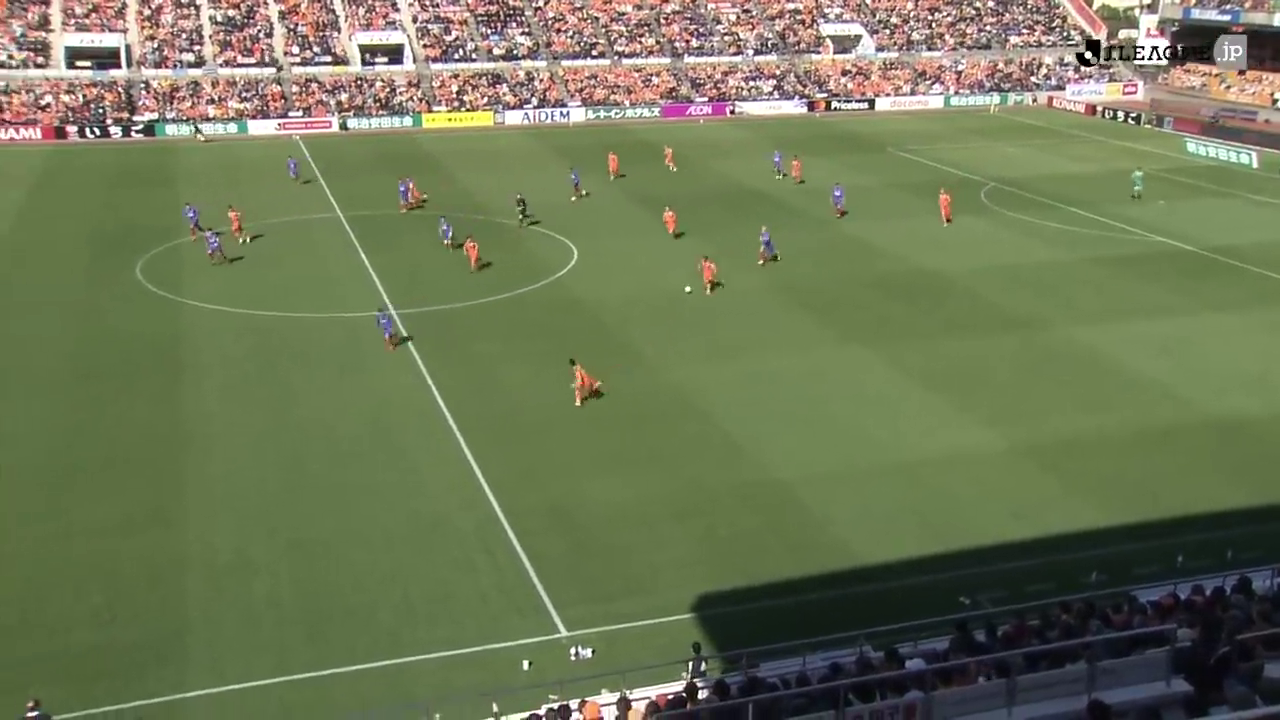

In [171]:
display_cv_image(image, '.png')

hsv image


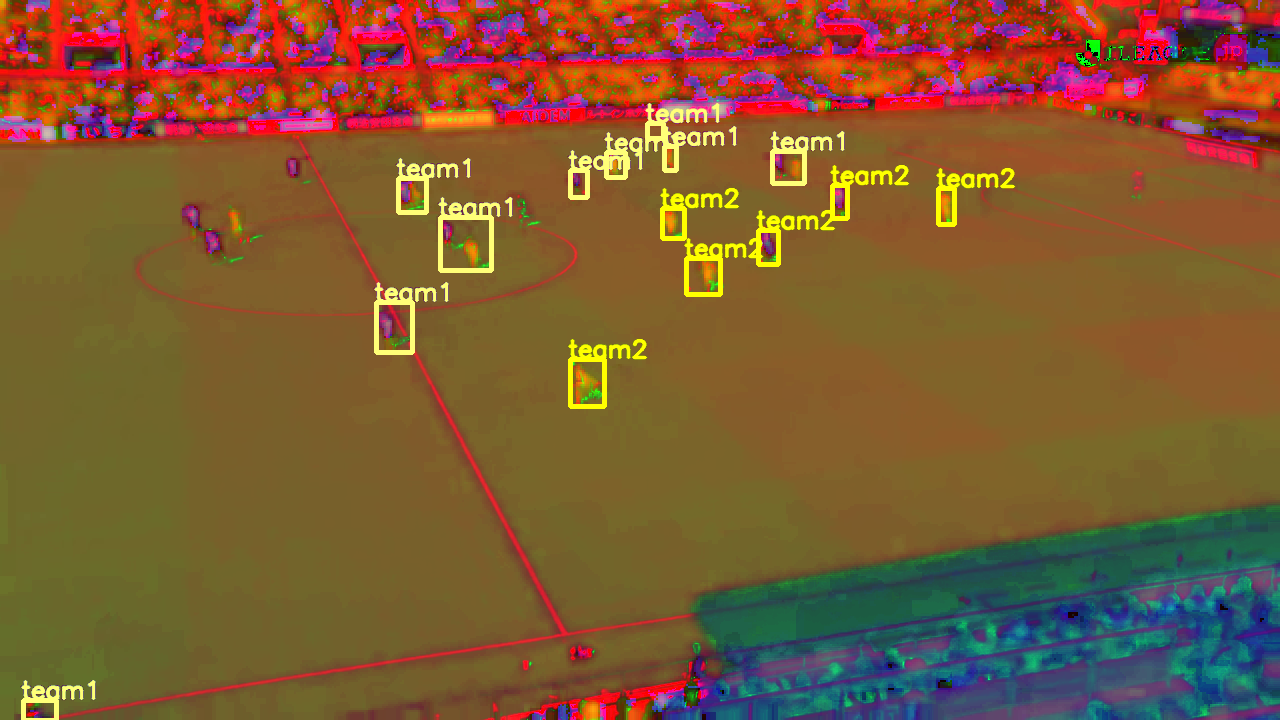

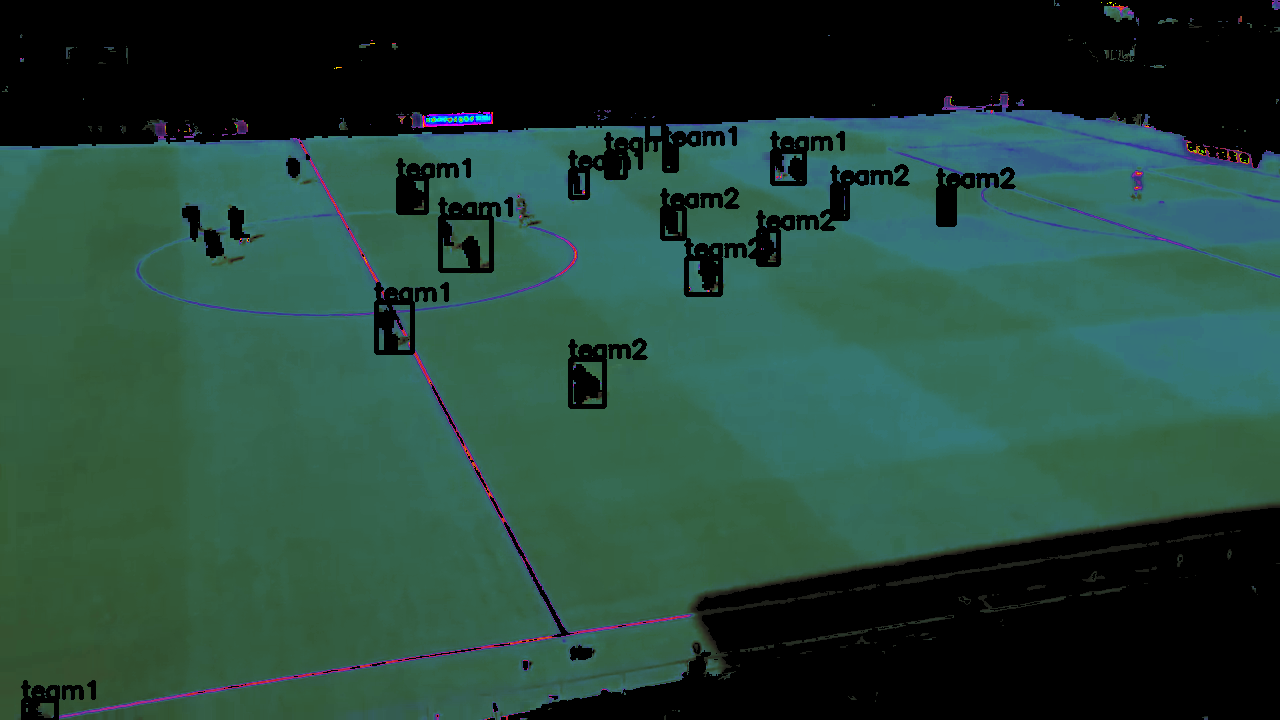

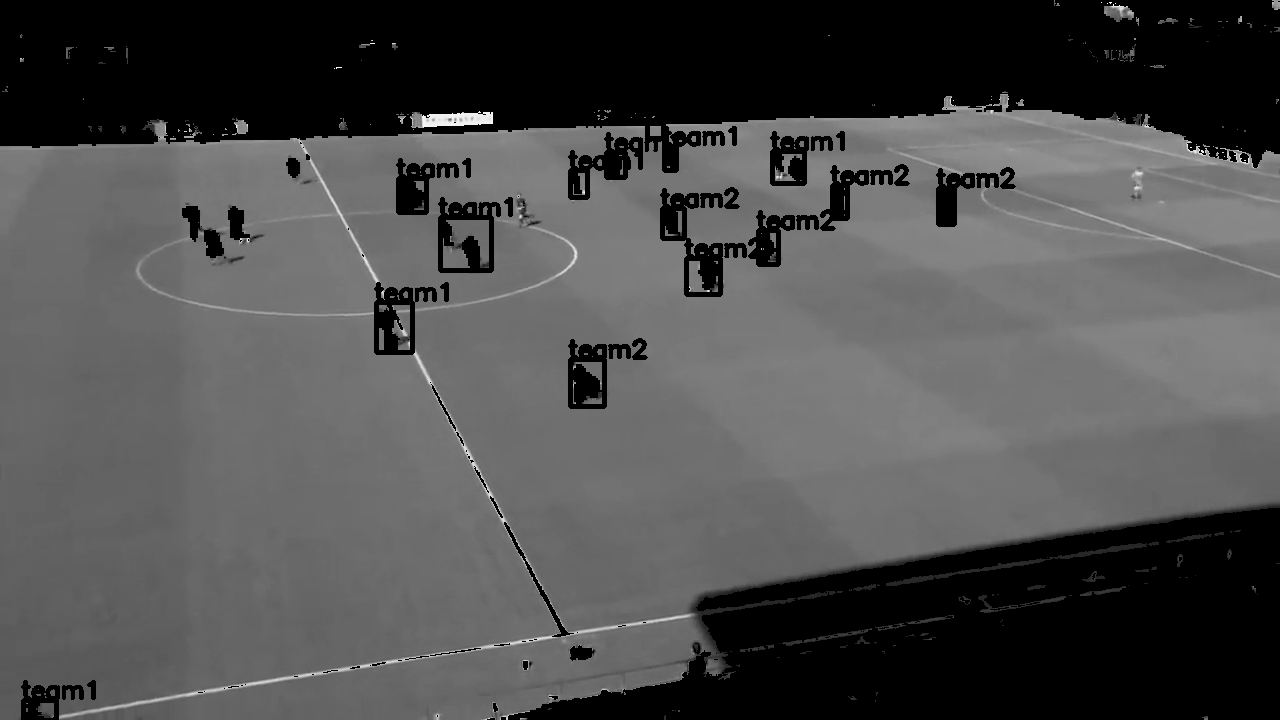

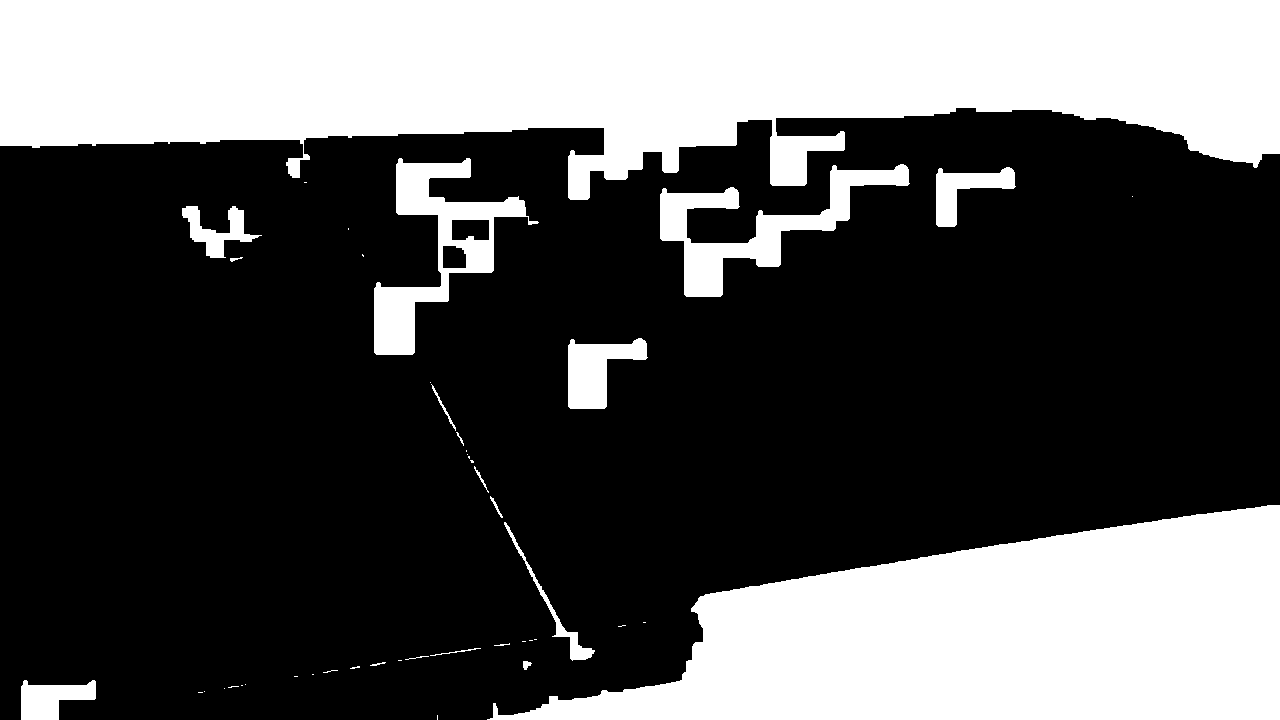

In [188]:
while success:
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    print("hsv image")
    display_cv_image(hsv, '.png')
    
    #green range
    lower_green = np.array([30,40, 40])
    upper_green = np.array([100, 255, 255])
    lower_red = np.array([30,31,255])
    upper_red = np.array([360,255,255])
    lower_blue = np.array([130,50,50])
    upper_blue = np.array([255,255,255])
    lower_white = np.array([0,0,0])
    upper_white = np.array([0,0,255])
    
    
    mask = cv2.inRange(hsv, lower_green, upper_green)
    res = cv2.bitwise_and(image, image, mask=mask)
    
    res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
    display_cv_image(res_bgr, '.png')
    res_gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
    display_cv_image(res_gray, '.png')
    
    kernel = np.ones((13,13),np.uint8)
    thresh = cv2.threshold(res_gray,127,255,cv2.THRESH_BINARY_INV |  cv2.THRESH_OTSU)[1]
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    display_cv_image(thresh, '.png')
    break

In [189]:
im2,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [190]:
idx = 0
font = cv2.FONT_HERSHEY_SIMPLEX

for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        print(w, h)
#         if w:
        if ( w > 2 and w < 60 and h > 2and h < 60):
#             print(w, h)
#             cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)
            
            idx += 1
            player_img = image[y:y+h,x:x+w]
            
            player_hsv = cv2.cvtColor(player_img,cv2.COLOR_BGR2HSV)
            mask1 = cv2.inRange(player_hsv, lower_blue, upper_blue)
            res1 = cv2.bitwise_and(player_img, player_img, mask=mask1)
            res1 = cv2.cvtColor(res1,cv2.COLOR_HSV2BGR)
            res1 = cv2.cvtColor(res1,cv2.COLOR_BGR2GRAY)
            nzCount = cv2.countNonZero(res1)
            
            mask2 = cv2.inRange(player_hsv, lower_red, upper_red)
            res2 = cv2.bitwise_and(player_img, player_img, mask=mask2)
            res2 = cv2.cvtColor(res2,cv2.COLOR_HSV2BGR)
            res2 = cv2.cvtColor(res2,cv2.COLOR_BGR2GRAY)
            nzCountred = cv2.countNonZero(res2)
            
            if(nzCount >= 10):
#                 cv2.putText(image, 'team1', (x-2, y-2), font, 0.8, (255,0,0), 2, cv2.LINE_AA)
                cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
            if(nzCountred>=10):
                #Mark red jersy players as belgium
#                 cv2.putText(image, 'team2', (x-2, y-2), font, 0.8, (0,0,255), 2, cv2.LINE_AA)
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),3)

1 5
5 1
1 1
1 1
11 2
2 1
1 1
75 40
4 1
2 1
15 3
10 3
16 4
9 9
4 1
24 4
51 8
16 3
4 1
4 1
3 1
8 2
3 1
91 139
793 215
13 22
15 27
4 3
2 3
1 1
1 2
8 14
25 47
1 1
80 71
13 5
2 3
1 2
80 52
1 1
3 1
80 60
250 133
165 197
25 24
39 22
1280 200


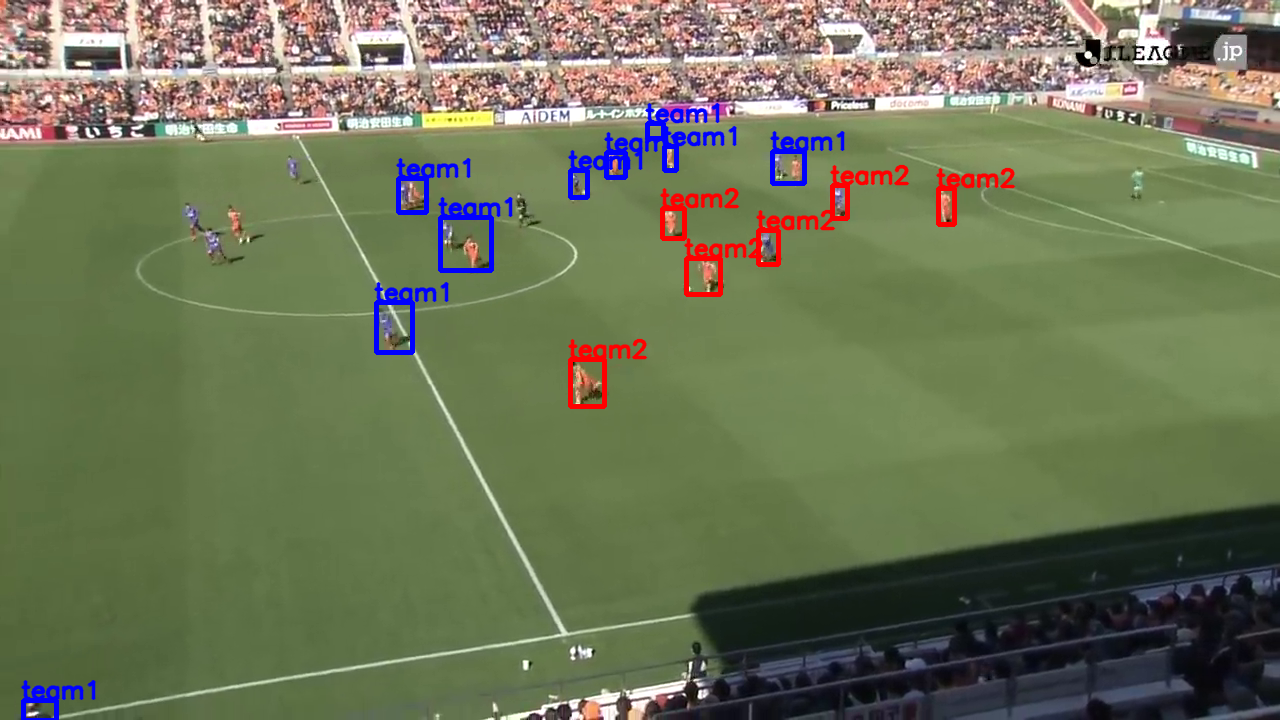

In [191]:
display_cv_image(image, '.png')